In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
price = pd.read_csv("../../data/agg_crude_price.csv")
price.head()

,Unnamed: 0,Date,PX_LAST,PX_VOLUME,PX_LAST_2,PX_VOLUME_2,PX_LAST_3,PX_VOLUME_3,PX_LAST_4,PX_VOLUME_4,...,PX_LAST_20,PX_VOLUME_20,PX_LAST_21,PX_VOLUME_21,PX_LAST_22,PX_VOLUME_22,PX_LAST_23,PX_VOLUME_23,PX_LAST_24,PX_VOLUME_24
0,0,2023-04-12,87.34,342958.0,86.73,227569.0,85.99,121870.0,85.26,86761.0,...,77.04,359.0,76.63,125.0,76.22,104.0,75.87,11.0,75.52,NaN
1,1,2023-04-11,85.61,262666.0,85.17,160501.0,84.54,81421.0,83.91,66394.0,...,75.92,32.0,75.54,22.0,75.15,551.0,74.82,420.0,74.49,382.0
2,2,2023-04-10,84.18,140529.0,83.79,69500.0,83.21,39973.0,82.61,34081.0,...,75.05,13.0,74.69,14.0,74.33,5.0,74.03,1.0,73.73,NaN
3,3,2023-04-06,85.12,259617.0,84.67,158730.0,84.04,85807.0,83.39,55552.0,...,75.51,90.0,75.14,31.0,74.77,21.0,74.46,NaN,74.16,NaN
4,4,2023-04-05,84.99,246479.0,84.62,139082.0,84.04,74685.0,83.42,64434.0,...,75.62,1577.0,75.25,1032.0,74.88,1205.0,74.57,863.0,74.27,813.0


In [3]:
price["Date"] = pd.to_datetime(price["Date"])
price_cols = [x for x in price.columns if "LAST" in x]
df_subset = price[["Date"] + price_cols[:12]]
df_subset.index = df_subset["Date"]
df_subset = df_subset.drop(columns=["Date"])
print(f"Shape before dropping nulls, {df_subset.shape}")
df_subset = df_subset.dropna()
print(f"Shape after dropping nulls, {df_subset.shape}")

Shape before dropping nulls, (5152, 12)
Shape after dropping nulls, (5148, 12)


<AxesSubplot:xlabel='Date'>

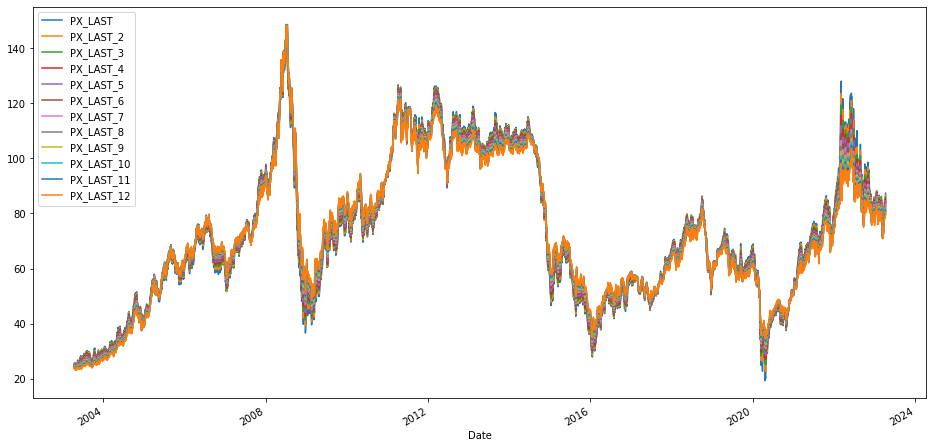

In [4]:
fig,ax=plt.subplots(figsize=(16,8))
df_subset.plot(ax=ax)

In [5]:
df_subset.head()

,PX_LAST,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8,PX_LAST_9,PX_LAST_10,PX_LAST_11,PX_LAST_12
Date,,,,,,,,,,,,
2023-04-12,87.34,86.73,85.99,85.26,84.58,83.93,83.35,82.67,82.08,81.60,81.01,80.52
2023-04-11,85.61,85.17,84.54,83.91,83.27,82.64,82.02,81.41,80.83,80.30,79.78,79.29
2023-04-10,84.18,83.79,83.21,82.61,82.00,81.40,80.81,80.23,79.67,79.17,78.67,78.21
2023-04-06,85.12,84.67,84.04,83.39,82.73,82.10,81.48,80.88,80.31,79.78,79.27,78.78
2023-04-05,84.99,84.62,84.04,83.42,82.77,82.15,81.55,80.97,80.41,79.89,79.39,78.91


In [6]:
df_return = (df_subset.apply(lambda x: np.log(x.shift(1) / x))).shift(-1)
df_return.head()

,PX_LAST,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8,PX_LAST_9,PX_LAST_10,PX_LAST_11,PX_LAST_12
Date,,,,,,,,,,,,
2023-04-12,0.020006,0.018151,0.017006,0.015961,0.015609,0.015489,0.016085,0.015359,0.015346,0.016060,0.015300,0.015394
2023-04-11,0.016845,0.016336,0.015857,0.015614,0.015369,0.015119,0.014862,0.014601,0.014455,0.014172,0.014011,0.013715
2023-04-10,-0.011105,-0.010448,-0.009925,-0.009398,-0.008863,-0.008563,-0.008257,-0.008069,-0.008001,-0.007675,-0.007598,-0.007262
2023-04-06,0.001528,0.000591,0.000000,-0.000360,-0.000483,-0.000609,-0.000859,-0.001112,-0.001244,-0.001378,-0.001513,-0.001649
2023-04-05,0.000588,0.000828,0.000833,0.000959,0.000967,0.000974,0.000981,0.001112,0.001120,0.001127,0.001134,0.001014


In [7]:
df_return.corr()

,PX_LAST,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8,PX_LAST_9,PX_LAST_10,PX_LAST_11,PX_LAST_12
PX_LAST,1.000000,0.980798,0.971727,0.962013,0.954503,0.946944,0.940483,0.935119,0.929066,0.924938,0.919523,0.914286
PX_LAST_2,0.980798,1.000000,0.996922,0.991341,0.986692,0.980832,0.975701,0.971476,0.966435,0.962765,0.957477,0.953463
PX_LAST_3,0.971727,0.996922,1.000000,0.997290,0.994992,0.990873,0.987019,0.983736,0.979372,0.976382,0.971671,0.968062
PX_LAST_4,0.962013,0.991341,0.997290,1.000000,0.997895,0.995313,0.992609,0.990229,0.986557,0.984200,0.980015,0.976829
PX_LAST_5,0.954503,0.986692,0.994992,0.997895,1.000000,0.998199,0.996587,0.994944,0.991885,0.990141,0.986492,0.983709
PX_LAST_6,0.946944,0.980832,0.990873,0.995313,0.998199,1.000000,0.997672,0.996757,0.994281,0.993176,0.990032,0.987605
PX_LAST_7,0.940483,0.975701,0.987019,0.992609,0.996587,0.997672,1.000000,0.998008,0.996131,0.995638,0.992918,0.990909
PX_LAST_8,0.935119,0.971476,0.983736,0.990229,0.994944,0.996757,0.998008,1.000000,0.997523,0.997626,0.995322,0.993768
PX_LAST_9,0.929066,0.966435,0.979372,0.986557,0.991885,0.994281,0.996131,0.997523,1.000000,0.997397,0.995685,0.994529
PX_LAST_10,0.924938,0.962765,0.976382,0.984200,0.990141,0.993176,0.995638,0.997626,0.997397,1.000000,0.997639,0.996921


In [8]:
df_return.to_csv('/Users/yibeihu/Desktop/oil_return.csv')

In [9]:
df1 = df_subset.copy()
#df1['diff'] = df1['PX_LAST']-df1['PX_LAST_12']

## Shape of the future

In [10]:
from mpl_toolkits import mplot3d

In [11]:
df_plot = df1.loc[df1.index.day == 15]
dates = df_plot.index

df_plot.columns = range(1,df_plot.shape[1]+1)
df_plot.index = range(df_plot.shape[0])[::-1]

In [12]:
df_plot.head()

,1,2,3,4,5,6,7,8,9,10,11,12
171,73.69,73.28,73.05,72.81,72.57,72.31,72.06,71.81,71.57,71.32,71.11,70.91
170,85.38,85.05,84.50,84.04,83.57,83.09,82.60,82.15,81.70,81.23,80.77,80.35
169,81.21,81.32,80.99,80.70,80.38,80.08,79.73,79.35,78.97,78.59,78.21,77.83
168,93.86,92.75,91.73,90.73,89.79,88.90,88.11,87.36,86.62,85.92,85.30,84.74
167,90.84,89.61,88.12,86.79,85.66,84.70,83.92,83.27,82.75,82.23,81.71,81.23


<ipython-input-13-61c05c74416b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(dates)


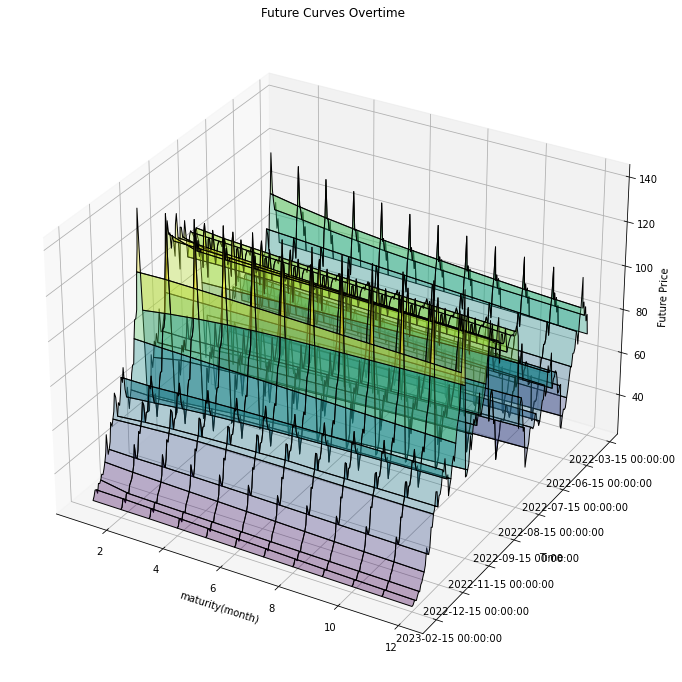

In [13]:
fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection='3d')

y, x = np.meshgrid(df_plot.index, df_plot.columns)
z = df_plot.values.T

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='black', alpha= 0.35)
ax.set_xlabel('maturity(month)')
ax.set_ylabel('Time')
ax.set_zlabel('Future Price')

ax.set_yticklabels(dates)

#ax.view_init(elev=20, azim=90)
# cset = ax.contour(x, y, z, cmap='coolwarm')
# ax.clabel(cset, fontsize=29, inline=True)

plt.title('Future Curves Overtime')
plt.show()

#### We can see that normally the future curve of brent oil futures are backwardation. However, at times, the curve can turns into forwardation shape, and this is the trading signal we want to catch. 

## Check when is the future curve Contago

In [14]:
df1.head()

,PX_LAST,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8,PX_LAST_9,PX_LAST_10,PX_LAST_11,PX_LAST_12
Date,,,,,,,,,,,,
2023-04-12,87.34,86.73,85.99,85.26,84.58,83.93,83.35,82.67,82.08,81.60,81.01,80.52
2023-04-11,85.61,85.17,84.54,83.91,83.27,82.64,82.02,81.41,80.83,80.30,79.78,79.29
2023-04-10,84.18,83.79,83.21,82.61,82.00,81.40,80.81,80.23,79.67,79.17,78.67,78.21
2023-04-06,85.12,84.67,84.04,83.39,82.73,82.10,81.48,80.88,80.31,79.78,79.27,78.78
2023-04-05,84.99,84.62,84.04,83.42,82.77,82.15,81.55,80.97,80.41,79.89,79.39,78.91


<AxesSubplot:xlabel='Date'>

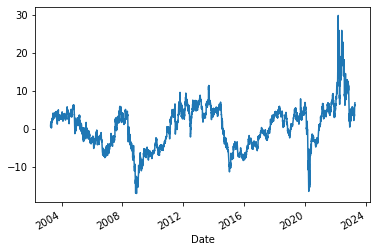

In [16]:
df1['diff'] = df1['PX_LAST']-df1['PX_LAST_12']
df1['diff'].plot()